In [1]:
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('SalesData.csv')

data.head(15)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
5,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Jul,0.00,10525.24,0.0,4.0,1.03,1.45
6,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Feb,2631.31,42812.62,1.0,17.0,1.08,0.99
7,2404,Account5,East,EMPIRE,BRIDGEPORT,CT,Low,Mar,4153.89,3918.77,1.0,1.0,0.79,1.46
8,2406,Account6,East,BIG APPLE,JERSEY CITY,NJ,Med,Mar,0.00,6951.86,0.0,2.0,1.12,1.02
9,2408,Account7,East,BIG APPLE,JERSEY CITY,NJ,High,Aug,0.00,10994.54,0.0,4.0,1.11,1.54


In [3]:
data_A1 = data[['Sales2015','Sales2016']].groupby(data['Region']).sum()

In [4]:
data_A1.head()

,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


In [5]:
Region_labels = data.Region.unique()
Region_labels.sort()
sales2015 = data_A1['Sales2015']
sales2016 = data_A1['Sales2016']
width = 0.25
x_indexes = np.arange(len(Region_labels))

In [6]:
plt.style.use('ggplot')

C:\Users\My Growth Diary\AppData\Local\Temp\ipykernel_27784\2737354814.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


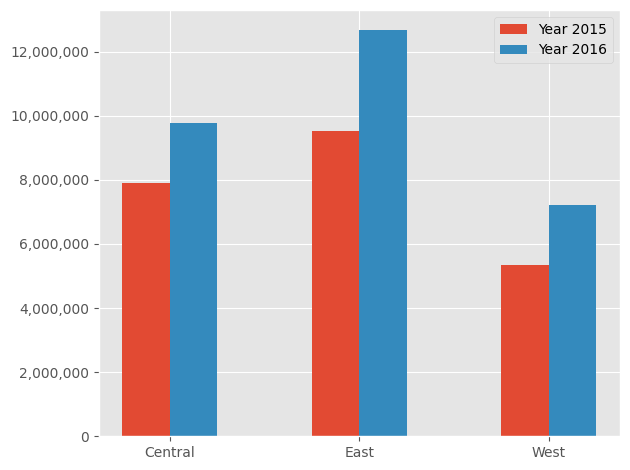

In [7]:
#ax.plot(x_indexes,sales2015).yaxis.set_major_formatter(FuncFormatter(millions_formatter))

legends = ['Year 2015', 'Year 2016']
plt.bar(x_indexes - width/2, sales2015, width = width)
plt.bar(x_indexes + width/2, sales2016, width = width)
plt.xticks(ticks = x_indexes , labels = Region_labels)

plt.legend(legends)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.tight_layout()
plt.show()

# Question 2
### What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.


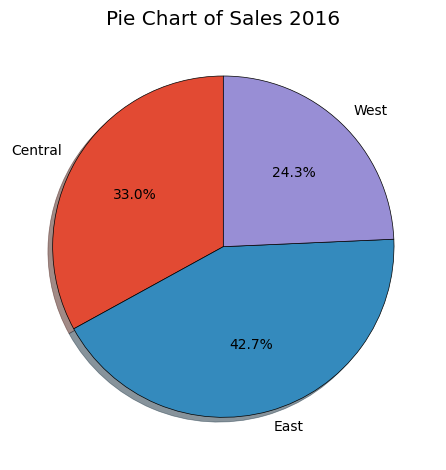

In [8]:
#slices = [59219, 55466, 47544, 36443, 35917]
#labels = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']
#explode = [0,0,0,0.1,0]


slices = sales2016
labels = Region_labels
plt.pie(slices, labels = labels,shadow = True, 
        startangle = 90, autopct = '%1.1f%%'
        , wedgeprops = {'edgecolor': 'black'})

plt.title("Pie Chart of Sales 2016")
plt.tight_layout()
plt.show()

# Question 3

### Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [9]:
data_A3 = data[['Region','Tier','Sales2015','Sales2016']].groupby(['Region','Tier'], as_index=False).sum()


data_central = data_A3.loc[data_A3['Region'] == "Central"]
sales2015_central = data_central['Sales2015']
sales2016_central = data_central['Sales2016']


data_West = data_A3.loc[data_A3['Region'] == "West"]
sales2015_West = data_West['Sales2015']
sales2016_West = data_West['Sales2016']


data_East = data_A3.loc[data_A3['Region'] == "East"]
sales2015_East = data_East['Sales2015']
sales2016_East = data_East['Sales2016']

C:\Users\My Growth Diary\AppData\Local\Temp\ipykernel_27784\1417851466.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


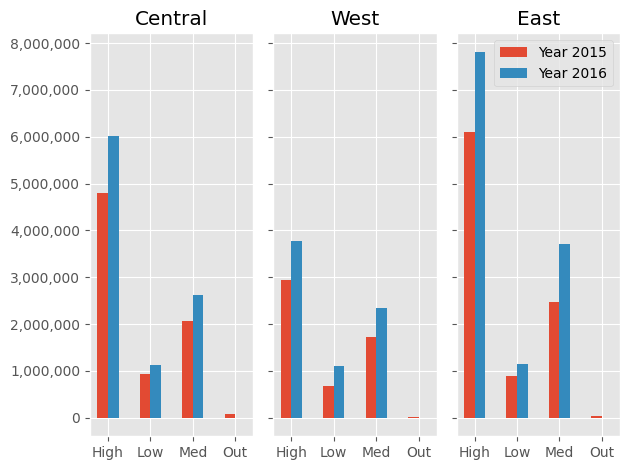

In [10]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3,sharey = True)
Tier_labels = data_A3.Tier.unique()
x_indexes_a3 = np.arange(len(data_A3['Tier'])/3)
width = 0.25

ax1.set_title("Central")
ax1.bar(x_indexes_a3 - width/2, sales2015_central, width = width)
ax1.bar(x_indexes_a3 + width/2, sales2016_central, width = width)
ax1.set_xticks(x_indexes_a3  , Tier_labels)

ax2.set_title("West")
ax2.bar(x_indexes_a3 - width/2, sales2015_West, width = width)
ax2.bar(x_indexes_a3 + width/2, sales2016_West, width = width)
ax2.set_xticks(x_indexes_a3  , Tier_labels)


ax3.set_title("East")
ax3.bar(x_indexes_a3 - width/2, sales2015_East, width = width)
ax3.bar(x_indexes_a3 + width/2, sales2016_East, width = width)
ax3.set_xticks(x_indexes_a3  , Tier_labels)
plt.legend(legends)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.tight_layout()
plt.show()

# Question 4
###  In East region, which state registered a decline in 2016 as compared to 2015?

In [11]:
data_A4 = data[['Sales2015','Sales2016']].groupby(data['State']).sum()
data_A4 = data_A4.astype({"Sales2015": int, "Sales2016": int})

In [12]:
data_A4.head(10)

,Sales2015,Sales2016
State,,
AL,509103,595828
AR,213317,227608
AZ,388987,519507
CA,1891620,2396883
CO,402338,504653
CT,197202,323502
DC,216723,257421
FL,1660162,2508232
GA,681546,946919


In [13]:
data_A4["Sales_Decline"] = np.where((data_A4['Sales2016'] < data_A4['Sales2015']),True,False)

In [14]:
data_A4_Final = data_A4[(data_A4['Sales_Decline'] == True)]
data_A4_Final

,Sales2015,Sales2016,Sales_Decline
State,,,
MS,304578,220410,True
NY,1725415,1703135,True


C:\Users\My Growth Diary\AppData\Local\Temp\ipykernel_27784\454666400.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


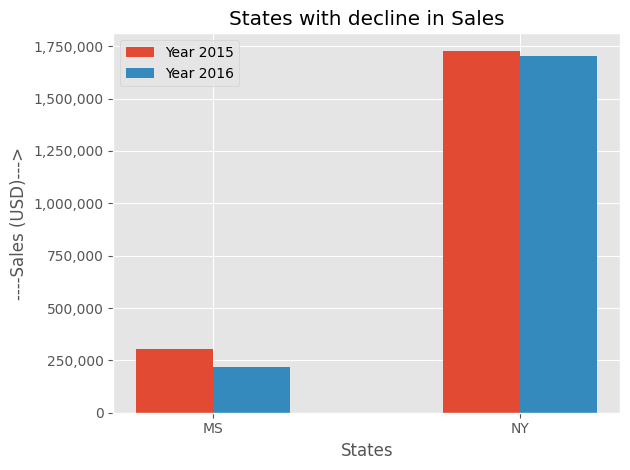

In [15]:
State_labels = data_A4_Final.index.unique()
#State_labels.sort()
sales2015 = data_A4_Final['Sales2015']
sales2016 = data_A4_Final['Sales2016']
width = 0.25
x_indexes_a4 = np.arange(len(State_labels))



legends_a4 = ['Year 2015', 'Year 2016']
plt.bar(x_indexes_a4 - width/2, sales2015, width = width)
plt.bar(x_indexes_a4 + width/2, sales2016, width = width)
plt.xticks(ticks = x_indexes_a4 , labels = State_labels)
plt.title("States with decline in Sales")
plt.xlabel("States")
plt.ylabel("----Sales (USD)--->")
plt.legend(legends_a4)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.tight_layout()
plt.show()